k-Nearest Neighbour Classifier using sklearn
=================================


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [2]:
#Loading data and preprocessing
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df=pd.read_csv(url)
df.columns=['sepal_length','sepal_width','petal_length','petal_width','flower_type']
df['flower_type'] = df['flower_type'].astype('category')
df.flower_type = df.flower_type.cat.rename_categories([0,1,2])
D=df.values


# Get the labelled set
c1=D[:20,:]; c2=D[50:70,:];  c3=D[100:120,:]
trainSet = np.concatenate((c1,c2,c3),axis=0)

# Get the testing set
c1 = D[21:50,:]; c2=D[71:100,:];  c3=D[121:,:]
testSet = np.concatenate((c1,c2,c3),axis=0)

xTrain=trainSet[:,:-1]; yTrain=trainSet[:,-1]
xTest=testSet[:,:-1]; yTest=testSet[:,-1]

In [3]:
# create a knn classifier with K=3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(xTrain, yTrain.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [4]:
# Make predictions
yPred=clf.predict(xTest)
acc=accuracy_score(yTest.astype(int), yPred.astype(int))
print('Accuracy with 3 neighbours: ',acc)

Accuracy with 3 neighbours:  0.93023255814


In [5]:
def plot_conf_mat(lTrue, lPred, title):
    """ A function for plotting the confusion matrix given true and predicted labels."""
    cm = confusion_matrix(lTrue.astype(int), lPred.astype(int))
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()    

[[28  0  0]
 [ 0 28  1]
 [ 0  5 24]]


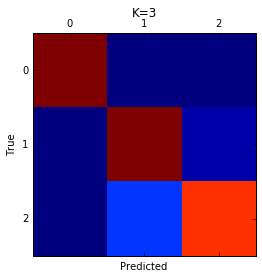

In [6]:
plot_conf_mat(yTest, yPred, 'K=3')